In [1]:
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Input
from keras.layers import Dropout
from keras.layers import Conv1D, MaxPooling2D, Flatten, Conv2D, Reshape, ZeroPadding2D
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import keras
from keras.layers import Layer
from keras.layers import Activation, Dense
from keras.layers.advanced_activations import LeakyReLU

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#De-Pickling Data with encoding latin1
with open("/content/drive/MyDrive/Gdrive/2016.04C.multisnr.pkl", 'rb') as f:
    Xd = pickle.load(f, encoding='latin1')

In [5]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])

In [6]:
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

In [7]:
np.random.seed(2016)
n_examples = X.shape[0]
n_train0 = int(n_examples * 0.8)
train_idx0 = np.random.choice(range(0,n_examples), size=n_train0, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx0))
X_train = X[train_idx0]
X_test =  X[test_idx]

In [ ]:
print(lbl[103700:103718])

[('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6), ('GFSK', 6)]


In [ ]:
print(test_idx[:40],train_idx0[:40])
print(X_test[25,:,:])

In [8]:
n_examples2 = X_train.shape[0]
n_train = int(n_examples2 * 0.8)
train_idx = np.random.choice(range(0,n_examples2), size=n_train, replace=False)
val_idx = list(set(range(0,n_examples2))-set(train_idx))
X_train = X[train_idx]
X_val =  X[val_idx]

In [9]:
print(X_train.shape,X_val.shape,X_test.shape)

(103718, 2, 128) (25930, 2, 128) (32412, 2, 128)


In [ ]:
print(len(lbl))
print(lbl[0])


162060
('8PSK', -20)


In [10]:
trainy = list(map(lambda x: mods.index(lbl[x][0]), train_idx))
valy = list(map(lambda x: mods.index(lbl[x][0]), val_idx))
testy = list(map(lambda x: mods.index(lbl[x][0]), test_idx))

In [ ]:
print(len(trainy))
print(valy[9])

103718
0


In [11]:
 from sklearn.preprocessing import OneHotEncoder
 from tensorflow.keras.utils import to_categorical

In [12]:
train_Y_one_hot = to_categorical(trainy,11)
val_Y_one_hot = to_categorical(valy,11)
test_Y_one_hot = to_categorical(testy,11)

In [13]:
print(train_Y_one_hot[6],val_Y_one_hot[9],test_Y_one_hot[9])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
print(test_Y_one_hot[32400:])

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [15]:
#model
batch_size = 64
epochs = 100

in_shp = list(X_train.shape[1:])
print (X_train.shape, in_shp)
classes = mods

#dr = 0.5 
# Reshape [N,2,128] to [N,1,2,128] on input
#input_x = Input(shape=(1,2,128))
#input_x_padding = ZeroPadding2D((0, 2), data_format="channels_first")(input_x)

radio_model = Sequential()
radio_model.add(Conv2D(32, kernel_size=(1, 2),activation='linear',input_shape=(1,2,128),padding='same'))
radio_model.add(LeakyReLU(alpha=0.1))
radio_model.add(MaxPooling2D((1, 2),padding='same'))
radio_model.add(Dropout(0.25))
radio_model.add(Conv2D(64, (1, 2), activation='linear',padding='same'))
radio_model.add(LeakyReLU(alpha=0.1))
radio_model.add(MaxPooling2D(pool_size=(1, 2),padding='same'))
radio_model.add(Dropout(0.25))
radio_model.add(Conv2D(128, (1, 2), activation='linear',padding='same'))
radio_model.add(LeakyReLU(alpha=0.1))                  
radio_model.add(MaxPooling2D(pool_size=(1, 2),padding='same'))
radio_model.add(Dropout(0.25))
radio_model.add(Flatten())
radio_model.add(Dense(128, activation='linear'))
radio_model.add(LeakyReLU(alpha=0.1))
radio_model.add(Dropout(0.25))                  
radio_model.add(Dense(11, activation='softmax'))


(103718, 2, 128) [2, 128]


In [16]:
radio_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [17]:
radio_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1, 2, 32)          8224      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1, 2, 32)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 1, 1, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 64)          4160      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 1, 1, 64)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 64)          0

In [18]:
X_train = np.reshape(X_train, (-1,1,2,128))
X_test = np.reshape(X_test, (-1,1,2,128))
X_val = np.reshape(X_val, (-1,1,2,128))
radio_train = radio_model.fit(X_train, train_Y_one_hot, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_val, val_Y_one_hot))

Epoch 1/100
1621/1621 [==============================] - 23s 5ms/step - loss: 2.4681 - accuracy: 0.2140 - val_loss: 1.4389 - val_accuracy: 0.4452
Epoch 2/100
1621/1621 [==============================] - 7s 4ms/step - loss: 1.4772 - accuracy: 0.4312 - val_loss: 1.2552 - val_accuracy: 0.5245
Epoch 3/100
1621/1621 [==============================] - 7s 4ms/step - loss: 1.3361 - accuracy: 0.4972 - val_loss: 1.1630 - val_accuracy: 0.5545
Epoch 4/100
1621/1621 [==============================] - 7s 4ms/step - loss: 1.2600 - accuracy: 0.5217 - val_loss: 1.1155 - val_accuracy: 0.5609
Epoch 5/100
1621/1621 [==============================] - 7s 4ms/step - loss: 1.2129 - accuracy: 0.5389 - val_loss: 1.0716 - val_accuracy: 0.5755
Epoch 6/100
1621/1621 [==============================] - 7s 4ms/step - loss: 1.1754 - accuracy: 0.5469 - val_loss: 1.0364 - val_accuracy: 0.5889
Epoch 7/100
1621/1621 [==============================] - 7s 4ms/step - loss: 1.1606 - accuracy: 0.5545 - val_loss: 1.0366 - val_a

In [19]:
score = radio_model.evaluate(X_test, test_Y_one_hot, verbose=0, batch_size=batch_size)
print("Validation Loss and Accuracy: ",score)

Validation Loss and Accuracy:  [4.72983455657959, 0.514531672000885]


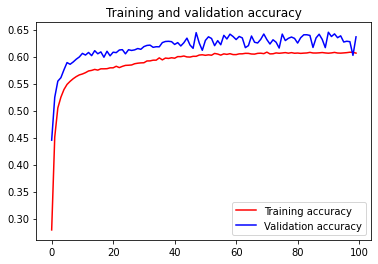

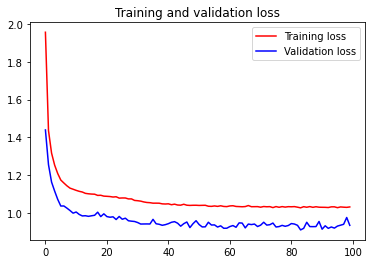

In [21]:

accuracy = radio_train.history['accuracy']
val_accuracy = radio_train.history['val_accuracy']
loss = radio_train.history['loss']
val_loss = radio_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
predicted_classes = radio_model.predict(X_test)
print(predicted_classes.shape)

(32412, 11)


In [23]:
predicted_classes1 = np.argmax(np.round(predicted_classes), axis=1)
print(predicted_classes.shape)
print(predicted_classes1[:11])

(32412, 11)
[0 0 0 0 0 0 0 0 0 0 0]


In [24]:
predicted_classes[:5]

array([[5.9708230e-02, 9.4855115e-02, 8.9070871e-02, 1.8851213e-01,
        1.7732088e-01, 2.0035420e-01, 1.0720052e-01, 8.2978055e-02,
        2.1589912e-08, 1.4074519e-08, 1.1027847e-08],
       [5.9001796e-02, 6.8873115e-02, 7.0782207e-02, 1.7857766e-01,
        1.6588995e-01, 1.3786368e-01, 1.7775346e-01, 1.4125787e-01,
        9.0069690e-08, 7.3353142e-08, 5.1670465e-08],
       [6.9479324e-02, 8.2428947e-02, 7.8907728e-02, 1.9748214e-01,
        1.6628215e-01, 2.3839441e-01, 9.4661482e-02, 7.2363853e-02,
        1.1622531e-10, 6.5933682e-11, 6.1994625e-11],
       [7.2304942e-02, 7.8387544e-02, 8.5206576e-02, 2.0794541e-01,
        1.5408245e-01, 2.5939128e-01, 7.9455756e-02, 6.3226059e-02,
        2.6322499e-12, 1.1406237e-12, 9.0049040e-13],
       [8.7401770e-02, 7.0274003e-02, 1.0702923e-01, 2.3121427e-01,
        1.6753322e-01, 2.1227673e-01, 6.7311920e-02, 5.6958858e-02,
        1.2822125e-11, 5.8292811e-12, 3.7746585e-12]], dtype=float32)

In [25]:
np.argmax(predicted_classes[2])

5

In [26]:
print(trainy[:40])
print(valy[:40])
print(testy[:11])

[7, 2, 5, 4, 4, 5, 0, 3, 1, 0, 5, 6, 3, 3, 2, 2, 7, 4, 4, 5, 6, 7, 1, 1, 6, 6, 6, 5, 1, 6, 3, 2, 5, 5, 6, 2, 5, 4, 5, 5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[8, 8, 0, 0, 0, 8, 0, 8, 0, 0, 0]


In [27]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(testy, predicted_classes1)

In [28]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

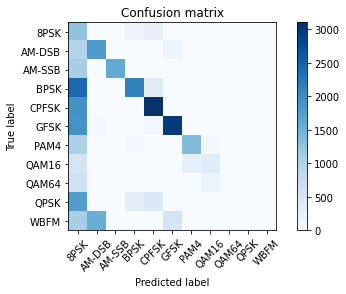

In [29]:
plot_confusion_matrix(cfm,labels = classes)